In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
case = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
case.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284.0,19.7,378.08,14.44,16.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4
36,0.09744,0.0,5.96,0,0.499,5.841,61.4,3.3779,5,279.0,19.2,377.56,11.41,20.0
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188.0,19.1,389.15,14.37,22.0
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67,26.5
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93,20.5
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
216,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276.0,16.4,392.80,13.51,23.3
46,0.18836,0.0,6.91,0,0.448,5.786,33.3,5.1004,3,233.0,17.9,396.90,14.15,20.0


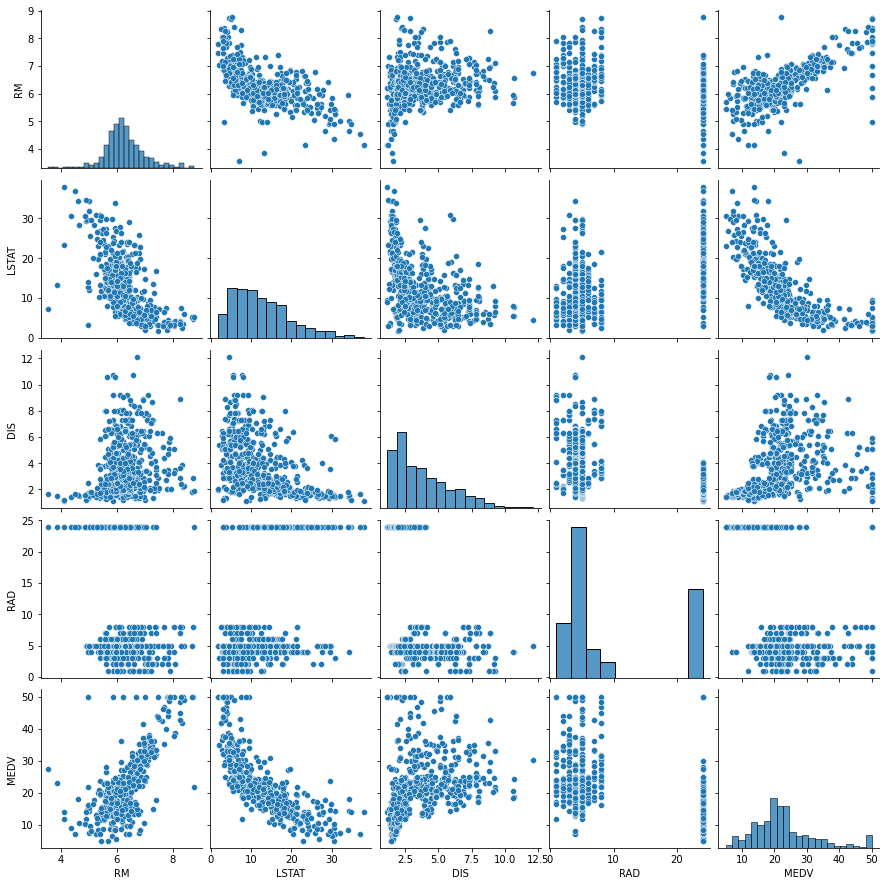

In [3]:
cols = ['RM','LSTAT', 'DIS', 'RAD', 'MEDV']
sns.pairplot(case[cols])

In [4]:
x = case[['LSTAT']].values
y = case['MEDV'].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

scores = []

for i in range(1,11):
    polyfeats = PolynomialFeatures(degree=i)
    x_train_poly = polyfeats.fit_transform(x_train)
    x_test_poly = polyfeats.transform(x_test)
    ll = LinearRegression()
    ll.fit(x_train_poly, y_train)
    y_pred = ll.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=33.51954917268489 R2=0.5429180422970386
DEGREE 2: MSE=27.36283147864024 R2=0.6268727686008047
DEGREE 3: MSE=25.284048958982343 R2=0.655219629080009
DEGREE 4: MSE=24.15620283574871 R2=0.670599254603595
DEGREE 5: MSE=22.982733558482995 R2=0.6866010102296517
DEGREE 6: MSE=22.7763903108987 R2=0.6894147645280381
DEGREE 7: MSE=23.30951519727297 R2=0.6821449243070754
DEGREE 8: MSE=23.341951745216335 R2=0.6817026104573665
DEGREE 9: MSE=22.904984085123694 R2=0.6876612238175601
DEGREE 10: MSE=23.32339618504773 R2=0.6819556392712222
